<a href="https://colab.research.google.com/github/fjadidi2001/Insurance/blob/main/PredictClaimYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/telematics_syn.csv'
df = pd.read_csv(file_path)

In [4]:
pd.set_option('display.max_columns', None)

print(df.head(5))

   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  \
0  Urban             6213.71              25         70           0.849315   
1  Urban            12427.42              20         26           0.465753   
2  Urban            12427.42              14         84           0.520548   
3  Urban             6213.71              43         30           0.065753   
4  Urban             6213.71              65         70           0.441096   

   Total.miles.driven  Pct.drive.mon  Pct.dr

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Duration                100000 non-null  int64  
 1   Insured.age             100000 non-null  int64  
 2   Insured.sex             100000 non-null  object 
 3   Car.age                 100000 non-null  int64  
 4   Marital                 100000 non-null  object 
 5   Car.use                 100000 non-null  object 
 6   Credit.score            100000 non-null  float64
 7   Region                  100000 non-null  object 
 8   Annual.miles.drive      100000 non-null  float64
 9   Years.noclaims          100000 non-null  int64  
 10  Territory               100000 non-null  int64  
 11  Annual.pct.driven       100000 non-null  float64
 12  Total.miles.driven      100000 non-null  float64
 13  Pct.drive.mon           100000 non-null  float64
 14  Pct.drive.tue        

In [6]:
df.describe()

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,Pct.drive.wed,Pct.drive.thr,Pct.drive.fri,Pct.drive.sat,Pct.drive.sun,Pct.drive.2hrs,Pct.drive.3hrs,Pct.drive.4hrs,Pct.drive.wkday,Pct.drive.wkend,Pct.drive.rush am,Pct.drive.rush pm,Avgdays.week,Accel.06miles,Accel.08miles,Accel.09miles,Accel.11miles,Accel.12miles,Accel.14miles,Brake.06miles,Brake.08miles,Brake.09miles,Brake.11miles,Brake.12miles,Brake.14miles,Left.turn.intensity08,Left.turn.intensity09,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,314.204060,51.378950,5.639720,800.888870,9124.122908,28.839960,56.531390,0.502294,4833.575303,0.139365,0.151262,0.148288,0.153009,0.157641,0.137912,1.125241e-01,0.003931,0.000868,0.000242,0.749550,0.250450,0.097823,0.137598,5.533067,43.097120,4.532490,1.753550,0.929150,0.525090,0.357030,83.652540,9.594090,3.102530,1.349240,0.589900,0.354990,915.676300,718.053600,551.574010,487.340690,447.758420,843.461830,565.056100,326.654840,246.713120,198.753690,0.04494,137.602253
std,79.746222,15.467075,4.062135,83.382316,3826.144730,16.123717,24.036518,0.299189,4545.943016,0.042807,0.047612,0.044609,0.044418,0.043716,0.053069,4.986396e-02,0.008122,0.004005,0.002592,0.083039,0.083039,0.078752,0.069939,1.248339,62.104937,19.531385,14.560158,11.936031,9.699139,8.433604,80.229374,18.138818,12.701017,10.591411,9.124862,8.234056,16330.899091,15666.068925,14687.929802,14198.331308,13719.790281,11630.185503,10657.402935,9460.244357,8977.569994,8585.177049,0.21813,1264.320056
min,27.000000,16.000000,-2.000000,422.000000,0.000000,0.000000,11.000000,0.002740,0.095298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.880000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,200.000000,39.000000,2.000000,766.000000,6213.710000,15.000000,35.000000,0.249315,1529.897500,0.120894,0.130084,0.129348,0.133619,0.138615,0.109415,8.525815e-02,0.000000,0.000000,0.000000,0.710336,0.204727,0.037389,0.090424,4.911596,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,3.000000,1.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,365.000000,51.000000,5.000000,825.000000,7456.452000,29.000000,62.000000,0.490411,3468.287765,0.137909,0.147900,0.147083,0.151377,0.155996,0.134668,1.107058e-01,0.001308,0.000000,0.000000,0.752464,0.247536,0.078013,0.129842,5.890227,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.000000,2.000000,1.000000,0.000000,0.000000,66.000000,22.000000,3.000000,1.000000,0.000000,122.000000,43.000000,7.000000,2.000000,0.000000,0.00000,0.000000
75%,366.000000,63.000000,8.000000,856.000000,12427.420000,41.000000,78.000000,0.753425,6779.876842,0.155203,0.168479,0.165925,0.170582,0.174473,0.161304,1.347562e-01,0.004791,0.000584,0.000000,0.795273,0.289664,0.140843,0.174353,6

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Select columns related to acceleration and braking
accel_brake_columns = [col for col in df.columns if col.startswith('Accel') or col.startswith('Brake')]

# Create a DataFrame with only these columns
df_accel_brake = df[accel_brake_columns]


In [10]:
# Calculate the correlation matrix
corr_matrix = df_accel_brake.corr()


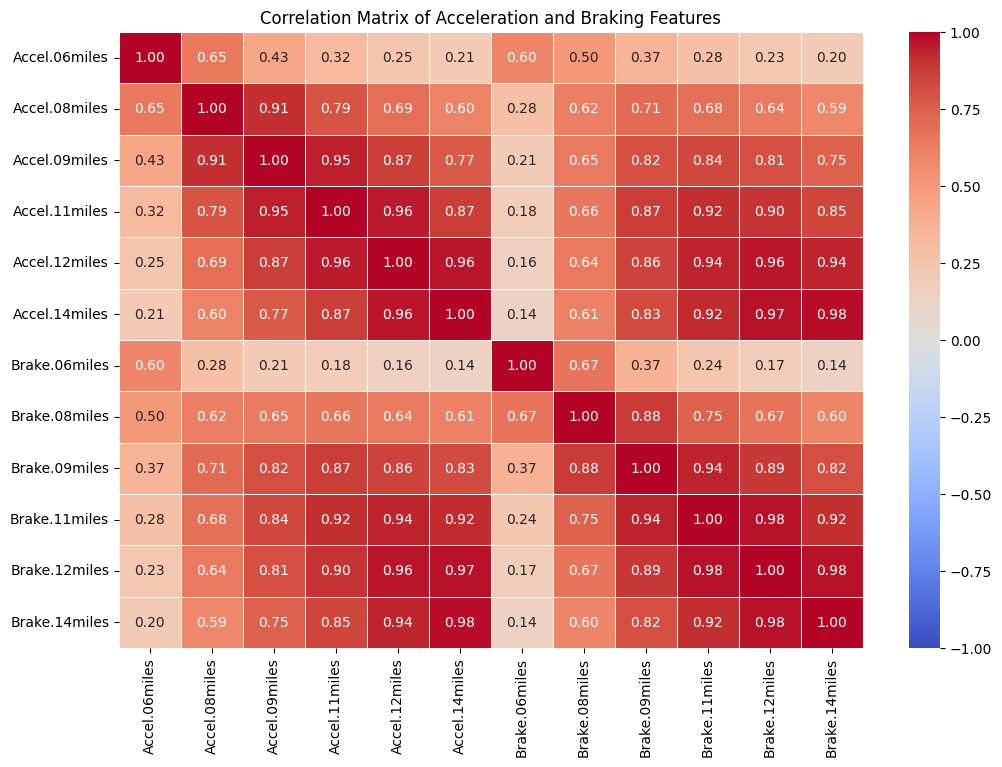

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Set titles and labels
plt.title('Correlation Matrix of Acceleration and Braking Features')
plt.show()




1. **High Correlation Among Acceleration Features**:
    - Features like `Accel.09miles`, `Accel.11miles`, `Accel.12miles`, and `Accel.14miles` are highly correlated with each other (correlation values above 0.9). This suggests that these features are providing very similar information.

2. **High Correlation Among Braking Features**:
    - Similarly, braking features like `Brake.11miles`, `Brake.12miles`, and `Brake.14miles` are highly correlated with each other, indicating redundancy.

3. **Moderate to High Cross-Correlation**:
    - There is also moderate to high correlation between acceleration and braking features, particularly between lower thresholds like `Accel.06miles` and `Brake.06miles`.


In [12]:
# Calculate the correlation of each feature with AMT_Claim
correlation_with_target = df[accel_brake_columns + ['AMT_Claim']].corr()['AMT_Claim'].sort_values(ascending=False)
print(correlation_with_target)


AMT_Claim        1.000000
Brake.06miles    0.049478
Brake.08miles    0.046641
Accel.06miles    0.037998
Brake.09miles    0.024599
Accel.08miles    0.016394
Brake.11miles    0.012633
Accel.09miles    0.007671
Brake.12miles    0.006152
Accel.11miles    0.005163
Accel.12miles    0.004271
Accel.14miles    0.003924
Brake.14miles    0.003806
Name: AMT_Claim, dtype: float64


Based on the correlation values between each feature and `AMT_Claim`, none of the `Accel` or `Brake` features have a strong correlation with the target variable.

- The highest correlation with `AMT_Claim` is only about 0.049 for `Brake.06miles`, which is still very low.
- Most features have correlations very close to zero, indicating a weak linear relationship with the target variable.

### Recommendations for Dropping/Keeping Features:

1. **Keep the Most Correlated Features**:
    - Even though the correlations are low, you might consider keeping the top 3-5 features with the highest correlation:
        - `Brake.06miles` (0.049)
        - `Brake.08miles` (0.047)
        - `Accel.06miles` (0.038)
    - These features might still provide some useful signal, albeit weak.

2. **Drop the Least Correlated Features**:
    - Features with near-zero correlation with `AMT_Claim` are less likely to contribute to model performance. You can drop the following features:
        - `Accel.14miles` (0.004)
        - `Brake.14miles` (0.004)
        - `Accel.12miles` (0.004)
        - `Accel.11miles` (0.005)
        - `Brake.12miles` (0.006)
        - `Accel.09miles` (0.008)




## Handle Missing Values

In [13]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Fill numerical NaNs with mean

categorical_columns = df.select_dtypes(exclude=np.number).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])  # Fill categorical NaNs with mode

## Encode Categorical Variables

In [14]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import tensorflow as tf

class LSTMCategoricalEncoder:
    def __init__(self, embedding_dim=4, lstm_units=8, sequence_length=10):
        self.tokenizers = {}
        self.models = {}
        self.embedding_dim = embedding_dim
        self.lstm_units = lstm_units
        self.sequence_length = sequence_length

    def _create_lstm_model(self, vocab_size):
        model = Sequential([
            Embedding(vocab_size, self.embedding_dim, input_length=self.sequence_length),
            LSTM(self.lstm_units, return_sequences=False),
            Dense(self.embedding_dim, activation='relu')
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def fit_transform(self, df, categorical_columns):
        encoded_data = {}

        for col in categorical_columns:
            # Initialize tokenizer
            tokenizer = Tokenizer()
            tokenizer.fit_on_texts(df[col].astype(str))
            self.tokenizers[col] = tokenizer

            # Convert categories to sequences
            sequences = tokenizer.texts_to_sequences(df[col].astype(str))
            padded_sequences = pad_sequences(sequences, maxlen=self.sequence_length)

            # Create and train LSTM model
            vocab_size = len(tokenizer.word_index) + 1
            model = self._create_lstm_model(vocab_size)

            # Create dummy target (using the same dimension as embedding)
            dummy_target = np.random.random((len(sequences), self.embedding_dim))

            # Train the model
            model.fit(padded_sequences, dummy_target, epochs=5, batch_size=32, verbose=0)
            self.models[col] = model

            # Generate embeddings
            encoded_values = model.predict(padded_sequences)

            # Store encoded values
            for i in range(self.embedding_dim):
                encoded_data[f"{col}_encoded_{i}"] = encoded_values[:, i]

        # Create new dataframe with encoded values
        encoded_df = pd.DataFrame(encoded_data)
        return encoded_df

    def transform(self, df, categorical_columns):
        encoded_data = {}

        for col in categorical_columns:
            if col not in self.tokenizers or col not in self.models:
                raise ValueError(f"Model not fitted for column: {col}")

            # Convert categories to sequences
            sequences = self.tokenizers[col].texts_to_sequences(df[col].astype(str))
            padded_sequences = pad_sequences(sequences, maxlen=self.sequence_length)

            # Generate embeddings
            encoded_values = self.models[col].predict(padded_sequences)

            # Store encoded values
            for i in range(self.embedding_dim):
                encoded_data[f"{col}_encoded_{i}"] = encoded_values[:, i]

        # Create new dataframe with encoded values
        encoded_df = pd.DataFrame(encoded_data)
        return encoded_df

def preprocess_dataset(df):
    # Identify categorical columns
    categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']

    # Initialize and fit LSTM encoder
    lstm_encoder = LSTMCategoricalEncoder(
        embedding_dim=4,  # Dimension of the encoded representation
        lstm_units=8,     # Number of LSTM units
        sequence_length=10 # Maximum sequence length
    )

    # Encode categorical variables
    encoded_categorical = lstm_encoder.fit_transform(df, categorical_columns)

    # Drop original categorical columns and join encoded values
    df_processed = df.drop(columns=categorical_columns)
    df_processed = pd.concat([df_processed, encoded_categorical], axis=1)

    return df_processed, lstm_encoder

In [15]:
# Preprocess the dataset
df_processed, encoder = preprocess_dataset(df)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [16]:
# from sklearn.preprocessing import LabelEncoder

# # Apply Label Encoding to categorical columns
# categorical_cols = df.select_dtypes(include=['object']).columns
# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le


In [17]:
df_processed.head()

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,Pct.drive.wed,Pct.drive.thr,Pct.drive.fri,Pct.drive.sat,Pct.drive.sun,Pct.drive.2hrs,Pct.drive.3hrs,Pct.drive.4hrs,Pct.drive.wkday,Pct.drive.wkend,Pct.drive.rush am,Pct.drive.rush pm,Avgdays.week,Accel.06miles,Accel.08miles,Accel.09miles,Accel.11miles,Accel.12miles,Accel.14miles,Brake.06miles,Brake.08miles,Brake.09miles,Brake.11miles,Brake.12miles,Brake.14miles,Left.turn.intensity08,Left.turn.intensity09,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,Insured.sex_encoded_0,Insured.sex_encoded_1,Insured.sex_encoded_2,Insured.sex_encoded_3,Marital_encoded_0,Marital_encoded_1,Marital_encoded_2,Marital_encoded_3,Car.use_encoded_0,Car.use_encoded_1,Car.use_encoded_2,Car.use_encoded_3,Region_encoded_0,Region_encoded_1,Region_encoded_2,Region_encoded_3
0,366,45,-1,609.0,6213.71,25,70,0.849315,8864.376247,0.148070,0.152466,0.143494,0.132412,0.169418,0.131632,0.122508,0.002607,0.000711,0.000000,0.744740,0.255260,0.199708,0.233929,6.528897,41.0,3.0,1.0,1.0,0.0,0.0,78.0,10.0,2.0,1.0,0.0,0.0,7.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753,0.0,0.499182,0.500681,0.0,0.0,0.518589,0.520279,0.49959,0.498352,0.484915,0.0,0.500009,0.493048,0.0,0.518014,0.0
1,182,44,3,575.0,12427.42,20,26,0.465753,8092.308208,0.147686,0.136917,0.135046,0.188125,0.159724,0.148017,0.084485,0.000377,0.000377,0.000188,0.766234,0.233766,0.150000,0.161883,6.500000,65.0,5.0,2.0,1.0,1.0,1.0,83.0,10.0,4.0,1.0,1.0,0.0,469.0,225.0,58.0,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840,0.0,0.498401,0.499752,0.0,0.0,0.518589,0.520279,0.49959,0.498352,0.484915,0.0,0.500009,0.493048,0.0,0.518014,0.0
2,184,48,6,847.0,12427.42,14,84,0.520548,3225.832512,0.153735,0.097124,0.129706,0.182424,0.168658,0.157462,0.110891,0.013296,0.000059,0.000000,0.730592,0.269408,0.040592,0.131185,5.388865,70.0,15.0,11.0,9.0,7.0,6.0,152.0,14.0,10.0,9.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.498401,0.499752,0.0,0.0,0.518589,0.520279,0.49959,0.498352,0.484915,0.0,0.500009,0.493048,0.0,0.518014,0.0
3,183,71,6,842.0,6213.71,43,30,0.065753,253.024528,0.106702,0.056437,0.134039,0.185479,0.253381,0.235744,0.028218,0.000000,0.000000,0.000000,0.732963,0.267037,0.079259,0.141112,5.148138,9.0,3.0,0.0,0.0,0.0,0.0,93.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.499182,0.500681,0.0,0.0,0.518589,0.520279,0.49959,0.498925,0.484385,0.0,0.499842,0.493048,0.0,0.518014,0.0
4,183,84,10,856.0,6213.71,65,70,0.441096,4374.379634,0.123807,0.169661,0.157235,0.165071,0.182776,0.105034,0.096416,0.002335,0.000833,0.000000,0.794932,0.205068,0.111583,0.058326,6.482803,73.0,3.0,0.0,0.0,0.0,0.0,27.0,2.0,1.0,0.0,0.0,0.0,80.0,22.0,2.0,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000,0.0,0.499182,0.500681,0.0,0.0,0.518589,0.520279,0.49959,0.498925,0.484385,0.0,0.499842,0.493048,0.0,0.518014,0.0


In [18]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Duration                100000 non-null  int64  
 1   Insured.age             100000 non-null  int64  
 2   Car.age                 100000 non-null  int64  
 3   Credit.score            100000 non-null  float64
 4   Annual.miles.drive      100000 non-null  float64
 5   Years.noclaims          100000 non-null  int64  
 6   Territory               100000 non-null  int64  
 7   Annual.pct.driven       100000 non-null  float64
 8   Total.miles.driven      100000 non-null  float64
 9   Pct.drive.mon           100000 non-null  float64
 10  Pct.drive.tue           100000 non-null  float64
 11  Pct.drive.wed           100000 non-null  float64
 12  Pct.drive.thr           100000 non-null  float64
 13  Pct.drive.fri           100000 non-null  float64
 14  Pct.drive.sat        

# Feature Selection

In [19]:

import numpy as np
import pandas as pd
import shap
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings('ignore')

class ComprehensiveFeatureSelector:
    def __init__(self, n_features=20):
        self.n_features = n_features
        self.selected_features = None
        self.feature_importances = {}

    def shap_selection(self, X, y):
        """SHAP-based feature selection"""
        # Train a Random Forest model
        rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        rf.fit(X, y)

        # Calculate SHAP values
        explainer = shap.TreeExplainer(rf)
        shap_values = explainer.shap_values(X)

        # For binary classification, take the absolute mean of SHAP values
        if isinstance(shap_values, list):
            shap_values = np.abs(shap_values[1].mean(axis=0))  # For binary classification
        else:
            shap_values = np.abs(shap_values).mean(axis=0)

        self.feature_importances['shap'] = dict(zip(X.columns, shap_values))
        return shap_values

    def fdr_selection(self, X, y):
        """False Discovery Rate based feature selection"""
        fdr_scores = []

        for column in X.columns:
            # Split data by class
            values_class_0 = X[column][y == 0]
            values_class_1 = X[column][y == 1]

            # Perform one-way ANOVA
            f_stat, p_value = f_oneway(values_class_0, values_class_1)
            fdr_scores.append(abs(f_stat))

        self.feature_importances['fdr'] = dict(zip(X.columns, fdr_scores))
        return np.array(fdr_scores)

    def pdp_selection(self, X, y):
        """Partial Dependence Plot based feature selection"""
        rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        rf.fit(X, y)

        pdp_scores = []
        for i, column in enumerate(X.columns):
            # Calculate partial dependence
            feature_values = np.linspace(X[column].min(), X[column].max(), num=10)
            pdp = []

            for value in feature_values:
                X_temp = X.copy()
                X_temp[column] = value
                predictions = rf.predict_proba(X_temp)[:, 1]
                pdp.append(predictions.mean())

            # Calculate variance of partial dependence as importance score
            pdp_scores.append(np.var(pdp))

        self.feature_importances['pdp'] = dict(zip(X.columns, pdp_scores))
        return np.array(pdp_scores)

    def autoencoder_selection(self, X):
        """Autoencoder-based feature selection"""
        # Normalize the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Build autoencoder
        input_dim = X.shape[1]
        input_layer = Input(shape=(input_dim,))
        encoded = Dense(input_dim//2, activation='relu')(input_layer)
        encoded = Dense(input_dim//4, activation='relu')(encoded)
        decoded = Dense(input_dim//2, activation='relu')(encoded)
        decoded = Dense(input_dim, activation='linear')(decoded)

        autoencoder = Model(input_layer, decoded)
        autoencoder.compile(optimizer='adam', loss='mse')

        # Train autoencoder
        autoencoder.fit(X_scaled, X_scaled, epochs=10, batch_size=32, verbose=0)

        # Get reconstruction error for each feature
        reconstructed = autoencoder.predict(X_scaled)
        reconstruction_errors = np.mean(np.abs(X_scaled - reconstructed), axis=0)

        self.feature_importances['autoencoder'] = dict(zip(X.columns, reconstruction_errors))
        return reconstruction_errors

    def resource_aware_selection(self, X, y):
        """Resource-aware feature selection"""
        # Simulate computational cost (using feature variance as a proxy)
        computation_costs = X.var().values

        # Calculate information gain (using random forest importance as proxy)
        rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        rf.fit(X, y)
        information_gain = rf.feature_importances_

        # Calculate efficiency score (information gain / computational cost)
        efficiency_scores = information_gain / (computation_costs + 1e-10)

        self.feature_importances['resource_aware'] = dict(zip(X.columns, efficiency_scores))
        return efficiency_scores

    def select_features(self, X, y):
        """Combine all feature selection methods"""
        # Get scores from each method
        shap_scores = self.shap_selection(X, y)
        fdr_scores = self.fdr_selection(X, y)
        pdp_scores = self.pdp_selection(X, y)
        autoencoder_scores = self.autoencoder_selection(X)
        resource_scores = self.resource_aware_selection(X, y)

        # Normalize scores from each method
        normalized_scores = np.column_stack([
            (shap_scores - shap_scores.min()) / (shap_scores.max() - shap_scores.min()),
            (fdr_scores - fdr_scores.min()) / (fdr_scores.max() - fdr_scores.min()),
            (pdp_scores - pdp_scores.min()) / (pdp_scores.max() - pdp_scores.min()),
            (autoencoder_scores - autoencoder_scores.min()) / (autoencoder_scores.max() - autoencoder_scores.min()),
            (resource_scores - resource_scores.min()) / (resource_scores.max() - resource_scores.min())
        ])

        # Calculate combined importance scores
        combined_scores = normalized_scores.mean(axis=1)

        # Select top features
        top_indices = np.argsort(combined_scores)[-self.n_features:]
        self.selected_features = X.columns[top_indices].tolist()

        return self.selected_features

    def plot_feature_importance(self):
        """Create visualization of feature importance"""
        import matplotlib.pyplot as plt

        if not self.selected_features:
            raise ValueError("Run select_features first")

        plt.figure(figsize=(15, 8))
        combined_importance = np.zeros(len(self.selected_features))

        for method, scores in self.feature_importances.items():
            importance = np.array([scores[feature] for feature in self.selected_features])
            normalized_importance = (importance - importance.min()) / (importance.max() - importance.min())
            combined_importance += normalized_importance

        combined_importance /= len(self.feature_importances)

        plt.barh(range(len(self.selected_features)), combined_importance)
        plt.yticks(range(len(self.selected_features)), self.selected_features)
        plt.xlabel('Combined Importance Score')
        plt.title('Feature Importance Across All Methods')
        plt.tight_layout()
        return plt

# Create ClaimYN

In [20]:
# # Create a new column ClaimYN based on AMT_Claim and NB_Claim
# df['ClaimYN'] = ((df['NB_Claim'] >= 1) & (df['AMT_Claim'] > 1000)).astype(int)

# # Check the distribution of the target variable
# df['ClaimYN'].value_counts()

In [21]:
# First make sure we have the target variable
# Create the ClaimYN column in the processed dataframe
df_processed['ClaimYN'] = ((df['NB_Claim'] >= 1) & (df['AMT_Claim'] > 1000)).astype(int)



In [22]:
# Prepare your data
X = df_processed.drop(['ClaimYN'], axis=1)
y = df_processed['ClaimYN']

# Select features
selector = ComprehensiveFeatureSelector(n_features=20)
selected_features = selector.select_features(X, y)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [23]:
# Get final dataset with selected features
X_selected = X[selected_features]

# Create FJIDEA model

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight


def create_fjidea_model(input_shape, output_shape):
    # Input layer
    inputs = Input(shape=(input_shape,))

    # TabNet-inspired layers
    tabnet = Dense(64, activation='relu')(inputs)
    tabnet = BatchNormalization()(tabnet)
    tabnet = Dropout(0.2)(tabnet)

    # XGBoost-inspired layers
    xgboost = Dense(32, activation='relu')(tabnet)
    xgboost = BatchNormalization()(xgboost)
    xgboost = Dropout(0.1)(xgboost)

    # RIPPER-inspired layers
    ripper = Dense(16, activation='relu')(xgboost)
    ripper = BatchNormalization()(ripper)
    ripper = Dropout(0.1)(ripper)

    # Concatenate the feature representations
    combined = Concatenate()([tabnet, xgboost, ripper])

    # Output layer
    output = Dense(output_shape, activation='sigmoid')(combined)

    model = Model(inputs=inputs, outputs=output)
    # Changed: lr to learning_rate in Adam optimizer
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Prepare data
X = X_selected
y = df_processed['ClaimYN']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modification to calculate and apply class weights ---
# Convert y_train to NumPy array to ensure correct indexing
y_train_np = y_train.to_numpy()

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = dict(zip(np.unique(y_train_np), class_weights))
# --- End of modification ---

# Create and train the FJIDEA model
model = create_fjidea_model(X_train.shape[1], 1)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9430 - loss: 0.2026 - val_accuracy: 0.9726 - val_loss: 0.1274
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9730 - loss: 0.1250 - val_accuracy: 0.9728 - val_loss: 0.1232
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9730 - loss: 0.1233 - val_accuracy: 0.9725 - val_loss: 0.1253
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9729 - loss: 0.1234 - val_accuracy: 0.9726 - val_loss: 0.1254
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9718 - loss: 0.1267 - val_accuracy: 0.9728 - val_loss: 0.1229
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9723 - loss: 0.1247 - val_accuracy: 0.9726 - val_loss: 0.1232
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9729 - loss: 0.1221 - val_accuracy: 0.9726 - val_loss: 0.1232
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9728 - loss: 0.1221 

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     19455
           1       0.00      0.00      0.00       545

    accuracy                           0.97     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.95      0.97      0.96     20000



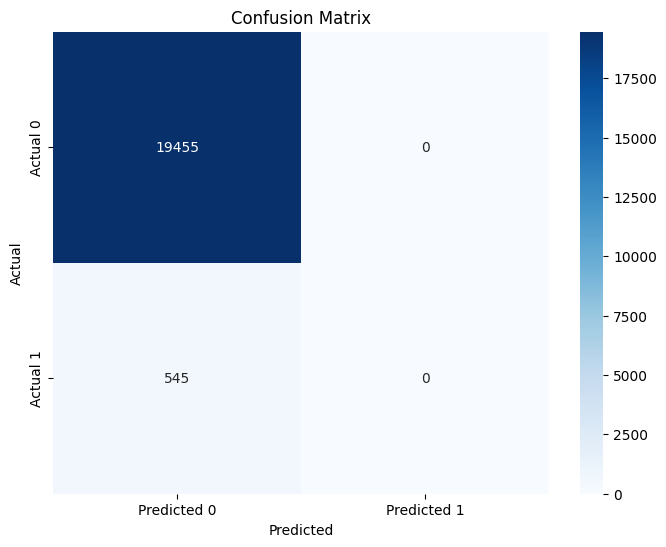

In [26]:
# prompt: classification report of model with better visulize

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your model

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Fix imbalance dataset

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = create_fjidea_model(X_train_resampled.shape[1], 1)
model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.5935 - loss: 0.6733 - val_accuracy: 0.3338 - val_loss: 0.7646
Epoch 2/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.6288 - loss: 0.6399 - val_accuracy: 0.5053 - val_loss: 0.6789
Epoch 3/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6410 - loss: 0.6267 - val_accuracy: 0.3981 - val_loss: 0.7480
Epoch 4/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.6455 - loss: 0.6228 - val_accuracy: 0.3536 - val_loss: 0.7997
Epoch 5/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6519 - loss: 0.6168 - val_accuracy: 0.3844 - val_loss: 0.7768
Epoch 6/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.6620 - loss: 0.6105 - val_accuracy: 0.4854 - val_loss: 0.7075
Epoch 7/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.6671 - loss: 0.6048 - val_accuracy: 0.5512 - val_loss: 0.6525
Epoch 8/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.6695 - loss: 0

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4474 - loss: 0.8034
Test Loss: 0.8024
Test Accuracy: 0.4484
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     19455
           1       0.04      0.81      0.07       545

    accuracy                           0.45     20000
   macro avg       0.51      0.63      0.34     20000
weighted avg       0.96      0.45      0.59     20000



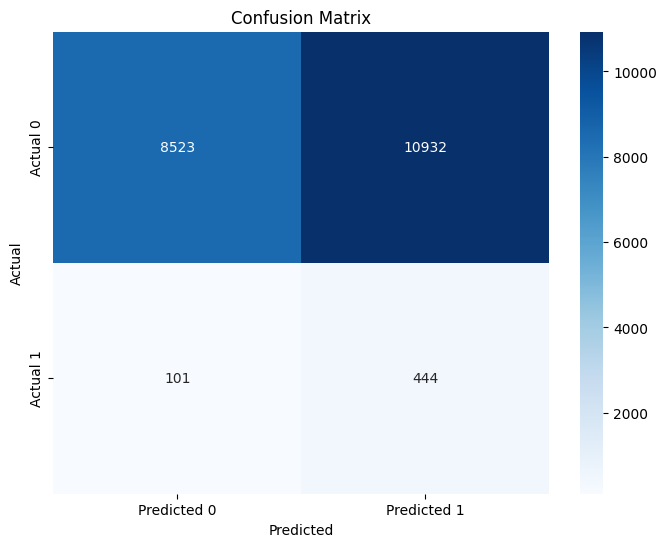

ROC AUC Score: 0.6264


In [28]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Assuming you have y_test and y_pred from your model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")

# You can also calculate other metrics like precision, recall, F1-score, etc.
# from the classification report.

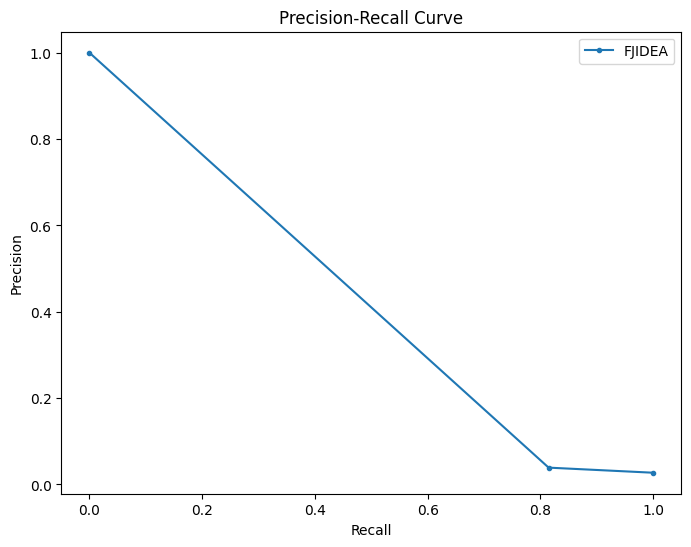

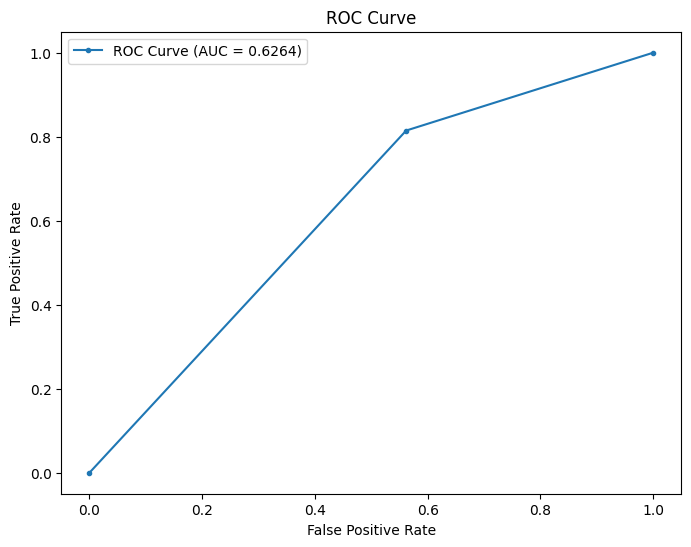

In [29]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Generate precision-recall data
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='FJIDEA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Generate ROC data
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [30]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [31]:
from keras_tuner import RandomSearch

def build_model(hp):
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation='relu')(inputs)
    x = Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='FJIDEA_tuning'
)
tuner.search(X_train_resampled, y_train_resampled, epochs=10, validation_data=(X_test, y_test))


Trial 10 Complete [00h 02m 47s]
val_accuracy: 0.5726000070571899

Best val_accuracy So Far: 0.6428499817848206
Total elapsed time: 00h 26m 31s


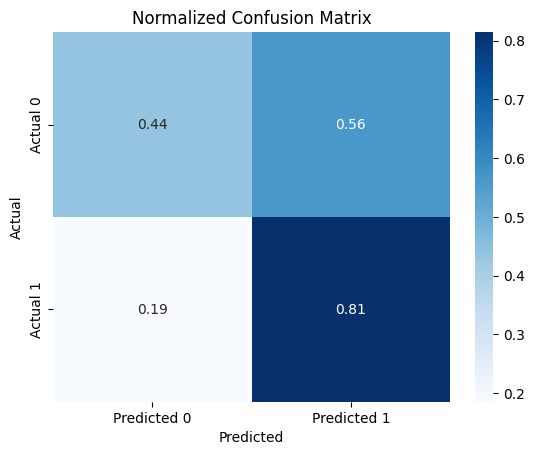

In [32]:
# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()


In [33]:
def resample_data(strategy, X, y):
    if strategy == 'SMOTE':
        smote = SMOTE(random_state=42)
        return smote.fit_resample(X, y)
    elif strategy == 'Class Weight':
        return X, y  # No resampling needed, class weights will be used

# Evaluate both strategies
for strategy in ['SMOTE', 'Class Weight']:
    print(f"Evaluating with {strategy}")
    X_train_resampled, y_train_resampled = resample_data(strategy, X_train, y_train)
    model = create_fjidea_model(X_train_resampled.shape[1], 1)
    model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Evaluating with SMOTE
Epoch 1/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5889 - loss: 0.6759 - val_accuracy: 0.3814 - val_loss: 0.7768
Epoch 2/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6310 - loss: 0.6373 - val_accuracy: 0.3688 - val_loss: 0.7617
Epoch 3/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6418 - loss: 0.6278 - val_accuracy: 0.4866 - val_loss: 0.6958
Epoch 4/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6541 - loss: 0.6162 - val_accuracy: 0.3354 - val_loss: 0.8645
Epoch 5/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6622 - loss: 0.6098 - val_accuracy: 0.5322 - val_loss: 0.6713
Epoch 6/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6711 - loss: 0.6020 - val_accuracy: 0.2639 - val_loss: 0.8695
Epoch 7/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6757 - loss: 0.5988 - val_accuracy: 0.3205 - val_loss: 0.8482
Epoch 8/50
4866/4866 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accu

In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9719 - loss: 0.1240
Test Loss: 0.1217
Test Accuracy: 0.9728


In [35]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.44      0.61     19455
           1       0.04      0.81      0.07       545

    accuracy                           0.45     20000
   macro avg       0.51      0.63      0.34     20000
weighted avg       0.96      0.45      0.59     20000



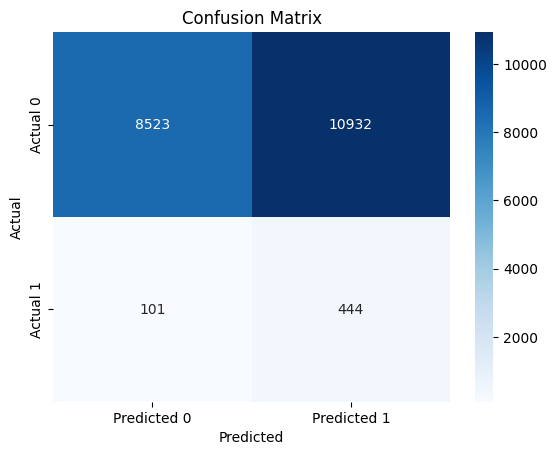

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [37]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.6264


In [39]:
!pip install imblearn xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [40]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

# Hyperparameter tuning
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Try different ensemble methods
models = [
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42),
    BalancedBaggingClassifier(random_state=42),
    BalancedRandomForestClassifier(random_state=42)
]

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"{model.__class__.__name__} ROC AUC: {scores.mean():.4f} ± {scores.std():.4f}")

Streaming output truncated to the last 5000 lines.
7:	learn: 0.2331775	total: 266ms	remaining: 32.9s
8:	learn: 0.2136388	total: 292ms	remaining: 32.2s
9:	learn: 0.1979205	total: 314ms	remaining: 31.1s
10:	learn: 0.1842117	total: 334ms	remaining: 30s
11:	learn: 0.1735992	total: 355ms	remaining: 29.3s
12:	learn: 0.1649072	total: 380ms	remaining: 28.8s
13:	learn: 0.1575540	total: 403ms	remaining: 28.4s
14:	learn: 0.1514566	total: 434ms	remaining: 28.5s
15:	learn: 0.1460028	total: 457ms	remaining: 28.1s
16:	learn: 0.1418002	total: 480ms	remaining: 27.8s
17:	learn: 0.1384374	total: 508ms	remaining: 27.7s
18:	learn: 0.1353371	total: 532ms	remaining: 27.5s
19:	learn: 0.1325394	total: 556ms	remaining: 27.3s
20:	learn: 0.1302876	total: 580ms	remaining: 27s
21:	learn: 0.1285052	total: 602ms	remaining: 26.8s
22:	learn: 0.1267709	total: 627ms	remaining: 26.6s
23:	learn: 0.1255118	total: 650ms	remaining: 26.4s
24:	learn: 0.1242818	total: 674ms	remaining: 26.3s
25:	learn: 0.1232288	total: 698ms	rema


Evaluating XGBClassifier

Evaluating LGBMClassifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2158, number of negative: 77842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3849
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.026975 -> initscore=-3.585499
[LightGBM] [Info] Start training from score -3.585499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

<Figure size 1500x500 with 0 Axes>

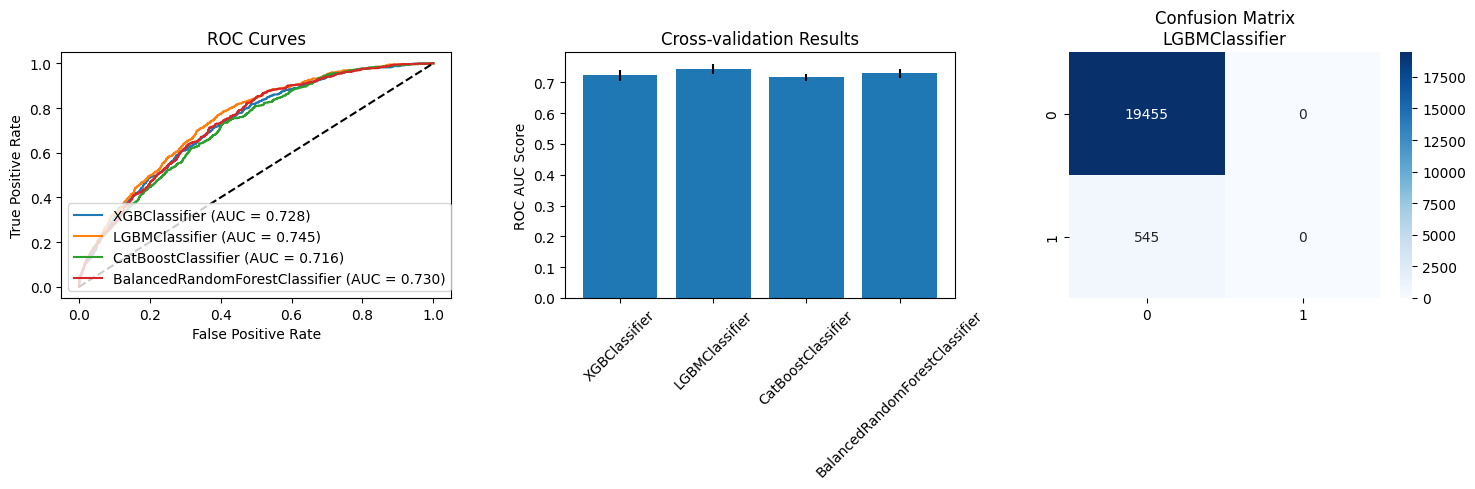


--------------------------------------------------

Results for XGBClassifier:

Cross-validation ROC AUC: 0.7224 ± 0.0167

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     19455
           1       0.00      0.00      0.00       545

    accuracy                           0.97     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.95      0.97      0.96     20000


--------------------------------------------------

Results for LGBMClassifier:

Cross-validation ROC AUC: 0.7431 ± 0.0170

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     19455
           1       0.00      0.00      0.00       545

    accuracy                           0.97     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.95      0.97      0.96     20000


--------------------------------------------------

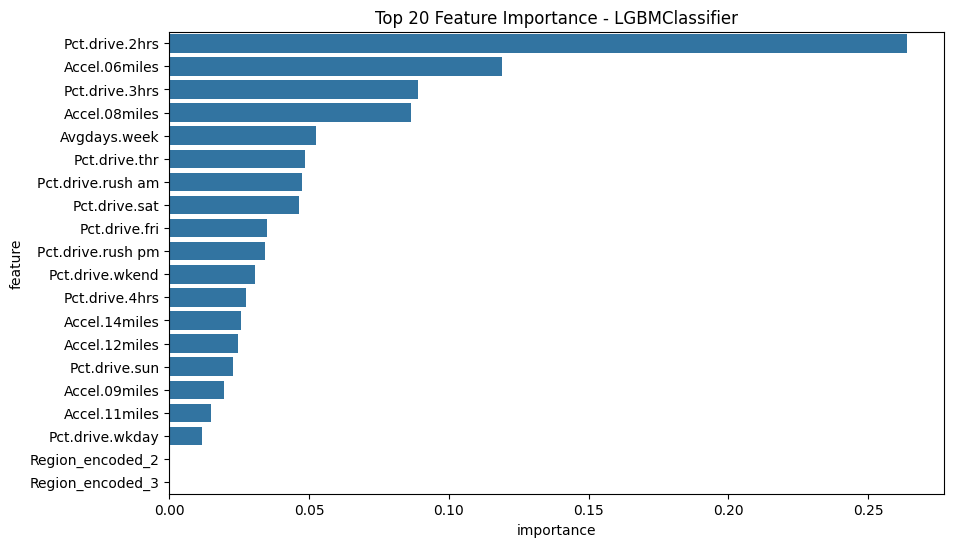

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

def evaluate_models(X, y, models, cv=5):
    """
    Comprehensive evaluation of multiple models
    """
    results = {}
    predictions = {}

    # Create figure for ROC curves
    plt.figure(figsize=(15, 5))

    # Evaluate each model
    for model in models:
        model_name = model.__class__.__name__
        print(f"\nEvaluating {model_name}")

        # Cross-validation scores
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        results[model_name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }

        # Fit model on full dataset for feature importance
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        predictions[model_name] = {
            'pred': y_pred,
            'pred_proba': y_pred_proba
        }

        # Calculate metrics
        results[model_name].update({
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        })

    return results, predictions

def plot_model_comparison(results, predictions):
    """
    Create visualizations for model comparison
    """
    # Plot 1: ROC Curves
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    for model_name, preds in predictions.items():
        fpr, tpr, _ = roc_curve(y_test, preds['pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()

    # Plot 2: Cross-validation Results
    plt.subplot(1, 3, 2)
    cv_means = [results[model]['cv_mean'] for model in results]
    cv_stds = [results[model]['cv_std'] for model in results]
    model_names = list(results.keys())

    plt.bar(model_names, cv_means, yerr=cv_stds)
    plt.xticks(rotation=45)
    plt.ylabel('ROC AUC Score')
    plt.title('Cross-validation Results')

    # Plot 3: Confusion Matrix Heatmap (for best model)
    plt.subplot(1, 3, 3)
    best_model = max(results.items(), key=lambda x: x[1]['cv_mean'])[0]
    cm = results[best_model]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix\n{best_model}')

    plt.tight_layout()
    plt.show()

# Initialize models with best parameters
models = [
    XGBClassifier(
        learning_rate=0.01,
        max_depth=5,
        n_estimators=200,
        random_state=42
    ),
    LGBMClassifier(
        learning_rate=0.01,
        max_depth=5,
        n_estimators=200,
        random_state=42
    ),
    CatBoostClassifier(
        learning_rate=0.01,
        max_depth=5,
        iterations=200,
        random_state=42,
        verbose=False
    ),
    BalancedRandomForestClassifier(
        max_depth=5,
        n_estimators=200,
        random_state=42
    )
]

# Evaluate models
results, predictions = evaluate_models(X, y, models)

# Plot results
plot_model_comparison(results, predictions)

# Print detailed results for each model
for model_name, result in results.items():
    print(f"\n{'-'*50}")
    print(f"\nResults for {model_name}:")
    print(f"\nCross-validation ROC AUC: {result['cv_mean']:.4f} ± {result['cv_std']:.4f}")
    print("\nClassification Report:")
    print(result['classification_report'])

# Feature importance analysis for the best model
best_model = max(results.items(), key=lambda x: x[1]['cv_mean'])[0]
if hasattr(models[0], 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': models[0].feature_importances_
    }).sort_values('importance', ascending=False)

    sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
    plt.title(f'Top 20 Feature Importance - {best_model}')
    plt.show()